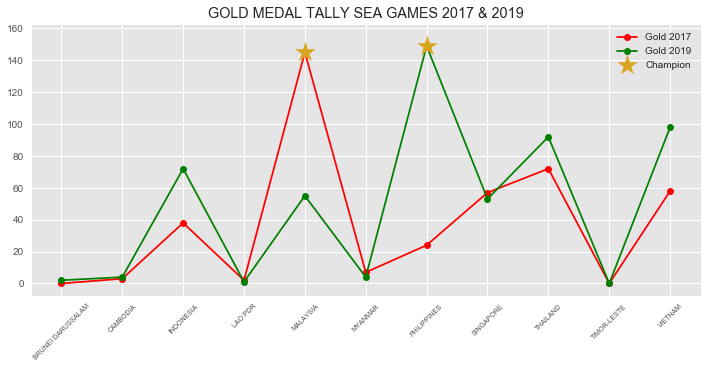

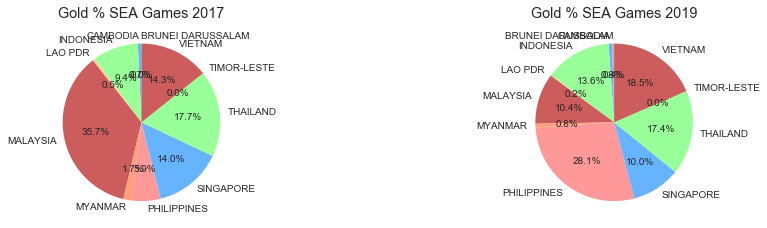

In [52]:
import matplotlib.pyplot as plt 
import pandas  as pd 
import numpy as np 
import requests
from bs4 import BeautifulSoup

## web scraping
web2017 = requests.get('https://www2.2019seagames.com/countries/')
data2017 = BeautifulSoup(web2017.content,'html.parser')
web2019 = requests.get('https://rs.2019seagames.com/RS2019/mobiapp/MedalTally')
data2019 = BeautifulSoup(web2019.content,'html.parser')

out = []
for i in data2017.find_all('em'):
    out.append(i.text)

output = []
for i in data2019.find_all('small'):
    output.append(i.text)

medali17 = []
for i in range(0,len(out),6):
    a1 = out[i:i+5]
    medali17.append(a1)
    
medali19 = []
for i in range(0,len(output),5):
    a = output[i:i+5]
    medali19.append(a)
jdl = medali19[0]
isi = medali19[1:]

duh = []
for i in medali17:
    hmm = i[2].split(' ')
    duh.append(hmm)

golden = []
for i in duh:
    i.remove('Gold:')
    golden.append(i)

gold = []
for i in golden:
    new = int(i[0])
    gold.append(new)
gold = gold[:11]

negara = []
for i in isi:
    negara.append(i[0])
negara = sorted(negara)


medal17 = []
for i in range(len(negara)):
    medal17.append([negara[i],gold[i]])
jdul2017 = ['Country','Gold']
data17 = []
for i in medal17:
    data17.append(dict(zip(jdul2017,i)))

dictmedal = []
for i in isi:
    dictmedal.append(dict(zip(jdl,i)))

df19 = pd.DataFrame(dictmedal)
df19 = df19.sort_values(by=['Contingent'])

df17 = pd.DataFrame(data17)
df19['Gold'] = df19['Gold'].astype(int)

## Visualization
plt.style.use('ggplot')
plt.figure(figsize=(12,5))
plt.plot(df17['Country'],df17['Gold'],label='Gold 2017',marker='o',color='red',zorder=3)
plt.plot(df19['Contingent'],df19['Gold'],label='Gold 2019',marker='o',color='green',zorder=3)
plt.scatter([4,6],[145,149],marker='*',color='goldenrod',s=400,zorder = 6,label='Champion')
plt.xticks(size=7,rotation='45')
plt.yticks(range(0,161,20))
plt.legend()
plt.title('GOLD MEDAL TALLY SEA GAMES 2017 & 2019')
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.title('Gold % SEA Games 2017')
plt.pie(df17['Gold'],labels=df17['Country'],autopct='%1.1f%%',startangle=90,colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','indianred','lightsalmon'])
plt.subplot(1,3,3)
plt.title('Gold % SEA Games 2019')
plt.pie(df19['Gold'],labels=df19['Contingent'],autopct='%1.1f%%',startangle=90,colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','indianred','lightsalmon'])
plt.show()